In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [3]:
dh3_measured = np.loadtxt('DH-3PlusCalLight-DeuteriumHalogen_HRD10391_13-38-35-263.txt', skiprows=14)

In [4]:
dh3_measured.shape

(2048, 2)

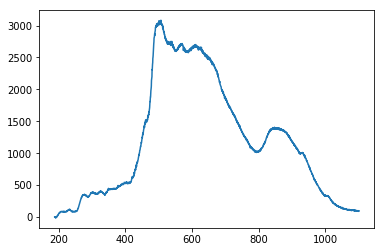

In [5]:
plt.plot(dh3_measured[:,0], dh3_measured[:,1])
plt.show()

In [6]:
dh3_interp = interp1d(dh3_measured[:,0], dh3_measured[:,1])

In [10]:
tucker = np.loadtxt('Calibrated_Source_Spectral_Output.txt', skiprows=1, delimiter=',')

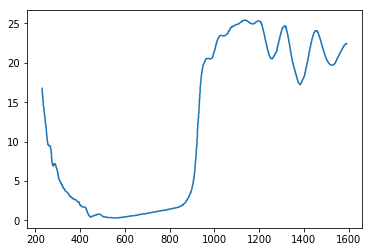

In [11]:
plt.plot(tucker[:,0], tucker[:,1])
plt.show()

In [12]:
tucker_interp = interp1d(tucker[:,0], tucker[:,1])

In [16]:
dh3_corr = tucker_interp(dh3_measured[100:,0]) / dh3_measured[100:,1]

In [31]:
oo_cal_curve = np.loadtxt('20180220-BF-Calibration_OOIIrrad.cal', skiprows=9)
print(oo_cal_curve.shape)

(2048, 2)


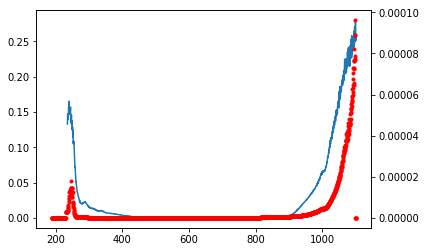

In [39]:
fig, ax1 = plt.subplots()

ax1.plot(dh3_measured[100:, 0], dh3_corr, label='Calculated')

ax2 = ax1.twinx()
ax2.plot(oo_cal_curve[:,0], oo_cal_curve[:,1], 'r.', label='Ocean Optics')

plt.show()

In [26]:
new_cal_curve = np.dstack((dh3_measured[100:, 0], dh3_corr))[0]

In [27]:
np.savetxt('jana_new_cal_curve.txt', new_cal_curve)

In [28]:
new_cal_curve.shape

(1948, 2)